# This Is a Small Example Using Fracnetics

## Install and Load Packages

In [259]:
!pip install --upgrade fracnetics
import fracnetics as fn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import copy


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


## Loading Data (Iris)

In [260]:
data = load_iris(as_frame=True)

In [261]:
X, y = data['data'], data['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=45,shuffle=True,stratify=y)
X_train=copy.deepcopy(X_train)
y_train=copy.deepcopy(y_train)

In [264]:
y_train.values

array([0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2,
       0, 1, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 0,
       0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0,
       1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 0])

In [246]:
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,135.000000,135.000000,135.000000,135.000000
mean,5.865926,3.064444,3.774074,1.195556
std,0.837922,0.435456,1.790396,0.758422
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.550000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.350000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Initializing the Population

In [247]:
# initializing population
pop = fn.Population(
    seed=42,
    ni=10000,
    jn=1,
    jnf=4,
    pn=3,
    pnf=3,
    fractalJudgment=False
)

In [248]:
minFeatures = X_train.min(axis=0).values
maxFeatures = X_train.max(axis=0).values

In [249]:
maxFeatures

array([7.9, 4.4, 6.9, 2.5])

In [250]:
minFeatures

array([4.3, 2. , 1. , 0.1])

In [251]:
pop.setAllNodeBoundaries(minFeatures,maxFeatures)

In [252]:
fitnessProgess = []
for g in range(100):
  pop.accuracy(
      X_train.values,
      y_train.values,
      dMax=10,
      penalty=2
  )
  pop.tournamentSelection(2,1)
  pop.callEdgeMutation(0.2, 0.2)
  pop.crossover(0.05)
  pop.callAddDelNodes(minFeatures,maxFeatures)
  maxFitness = pop.bestFit
  fitnessProgess.append(maxFitness)
  print(f"Generation: {g} | Best Fitness: {pop.bestFit}")

Generation: 0 | Best Fitness: 0.7185184955596924
Generation: 1 | Best Fitness: 0.7185184955596924
Generation: 2 | Best Fitness: 0.7185184955596924
Generation: 3 | Best Fitness: 0.7185184955596924
Generation: 4 | Best Fitness: 0.7185184955596924
Generation: 5 | Best Fitness: 0.7185184955596924
Generation: 6 | Best Fitness: 0.7185184955596924
Generation: 7 | Best Fitness: 0.7185184955596924
Generation: 8 | Best Fitness: 0.7185184955596924
Generation: 9 | Best Fitness: 0.7185184955596924
Generation: 10 | Best Fitness: 0.7185184955596924
Generation: 11 | Best Fitness: 0.7185184955596924
Generation: 12 | Best Fitness: 0.7185184955596924
Generation: 13 | Best Fitness: 0.7185184955596924
Generation: 14 | Best Fitness: 0.7185184955596924
Generation: 15 | Best Fitness: 0.7185184955596924
Generation: 16 | Best Fitness: 0.7185184955596924
Generation: 17 | Best Fitness: 0.7185184955596924
Generation: 18 | Best Fitness: 0.7185184955596924
Generation: 19 | Best Fitness: 0.7185184955596924
Generation

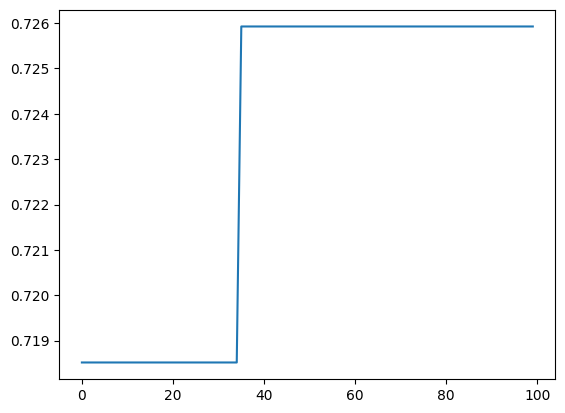

In [253]:
plt.plot(fitnessProgess)

In [254]:
print(f"Train Fitness: {pop.individuals[-1].fitness}")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=45,shuffle=False,stratify=None)

pop.accuracy(X_test.values,y_test.values,10,2)
print(f"Test Fitness: {pop.individuals[-1].fitness}")

Train Fitness: 0.7259259223937988
Test Fitness: 1.0


In [255]:
pop.individuals[-1].fitness
print(f"Start Node: {pop.individuals[-1].startNode.edges}")
for node in pop.individuals[-1].innerNodes:
  print(f"Type: {node.type} | Function: {node.f} Edges: {node.edges} | Boundaries: {node.boundaries}")

Start Node: [1]
Type: J | Function: 3 Edges: [2, 3, 1] | Boundaries: [0.10000000149011612, 0.9000000357627869, 1.7000000476837158, 2.5]
Type: P | Function: 2 Edges: [0] | Boundaries: []
Type: P | Function: 0 Edges: [4] | Boundaries: []
Type: P | Function: 1 Edges: [0] | Boundaries: []
Type: J | Function: 3 Edges: [5, 0, 0] | Boundaries: [0.10000000149011612, 0.9000000357627869, 1.7000000476837158, 2.5]
Type: P | Function: 0 Edges: [3] | Boundaries: []
Type: J | Function: 2 Edges: [1, 0, 2, 2, 0, 4] | Boundaries: [1.0, 1.9833333492279053, 2.9666666984558105, 3.950000047683716, 4.933333396911621, 5.9166669845581055, 6.90000057220459]


In [256]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Daten laden
iris = load_iris(as_frame=True)
df = iris.frame

# Nur petal width
X = df[["petal width (cm)"]]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=45,shuffle=True,stratify=y)

# Regelbasierte Vorhersagefunktion
def rule_based_classifier(petal_width):
    if petal_width <= 0.90:
        return 0  # Setosa
    elif petal_width <= 1.7:
        return 1  # Versicolor
    else:
        return 2  # Virginica

# Regeln auf gesamte Daten anwenden
y_pred = X_test["petal width (cm)"].apply(rule_based_classifier)

# Bewertung
accuracy = accuracy_score(y_test, y_pred)
print("Rule-based Accuracy:", accuracy)


Rule-based Accuracy: 0.9333333333333333
